

## <font color = #99c9bd> **Analise Exploratória - Dados clientes Ifood**

**Temos aqui uma base de dados com informações dos clientes, queremos saber qual o perfil geral e também, de forma mais especifica, qual o perfil que gasta mais e é mais ativo na plataforma. É interessante saber quem é esse cliente que gasta muito e está mais conectado a plataforma, mas também quem gasta pouco e está mais desconectado, vamos ver se os dados que temos disponíveis nos ajuda a traçar esses dois perfis.**

<font color = #99c9bd> **Características Gerais do Dataset**

In [125]:
# Importando bibliotecas

import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [126]:
# baixando os dados

dados = pd.read_csv("/Users/thaisfernandespereira/Documents/estat_analises/descritiva/mkt_data.csv")

In [127]:
# dando uma olhada nas colunas e primeiras linhas dos dados

dados.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [128]:
# dando uma olhada nas cateristicas baiscas das variáveis, tipo e quantidade de dados não nulos em cada coluna

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Essa primeira olhada nos dados nos ajuda a entender as informaçǒes disponiveis para trabalhar, como elas estão organizadas, com base nisso podemos traçar algumas estratégias de análise, tendo em vista o objetivo final. 

Os dados interessantes para traçar um perfil dos clientes são: age, recency, marital_status, 'Kids', education_level, income e expenses,  NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Escolhemos esses dados pois eles possibilitam combinar uma análise do perfil demográfico juntamente com o padrão de relacionamento com a plataforma. Podemos determinar qual tem sido o padrão de relacionamento de um determinado perfil demográfico. 

A seguir vamos filtrar a base de dados pelas variáveis de interesse e conhecê-las um pouco melhor.

In [135]:
# filtrando as variáveis de interesse

variaveis_interesse = [
    'Age', 'kids', 'Recency', 'marital_status', 'education_level', 
    'Income', 'expenses',  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth'
]

dados_1 = dados[variaveis_interesse]

# verificando quantidade de nulos nas variáveis de interesse

dados_1.isnull().sum()

Age                    0
kids                   0
Recency                0
marital_status         0
education_level        0
Income                 0
expenses               0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [108]:
qtd_duplicadas = dados_1.duplicated().sum()

print(f"Número de linhas duplicadas: {qtd_duplicadas}")

Número de linhas duplicadas: 203


In [ ]:
# Verificando se há linhas duplicadas

dados_1 = dados_1.drop_duplicates()

In [ ]:
# Ajustando os dados de renda para o formato mensal

dados_1['renda_mensal'] = dados_1['Income'] / 12

# Excluindo as linhas duplicadas: 

dados_1 = dados_1.drop('Income', axis=1)

Até aqui vimos que as variáveis de interesse não possuem valores nulos, mas encontramos 203 linhas duplicadas que resolvemos excluir para não atrapalhar a análise. 

Abaixo rodamos um describe, para obter informações gerais e rápidas dos dados numéricos. Aqui podemos tomar notas de algumas informações importantes: 

1. A idade média dos clientes da base variam bastante, 24 a 80 anos. Mas a média é 50 e a mediana é 51 o que demonstra que a distribuição é relativamente simétrica em torno dessa faixa, isso sugere que o público predominante está entre meia-idade e terceira idade. 
2. Em média os clientes tem 1 filhos, no mínimo nenhum e no máximo 3 filhos
3. A última compra tambêm varia bastante, entre 0 e 99 dias. Mas em média esses clientes estão há 49 dias sem comprar, com uma variação expressiva dessa média, já que o desvio padrão é 28 dias. 
4. A renda dos clientes é em media uns 4 mil reais podendo chegar a 9 mil
5. Os gastos também variam bastante, mas em média um cliente terá gasto uns 500 reais na plataforma, podendo chegar até mais de 2 mil 
6. O número de compras na promoção não parece ser muito frequente já que em media um cliente comprou apenas 2 vezes um produto nessa circunstância
7.  E para os demais, que mostram onde o cliente faz mais compras, se na web, no catalogo ou diretamente nas lojas, em média parece que diretamente na loja é uma preferência
8. Quanto às visitas ao site, os numeros são baixos, mas o numero máximo deixa pistas de que há um perfil que visita mais o site, iremos descobrir qual 

Essa análise é boa para nos dizer aspectos gerais dos clientes, agora sabemos que parece um perfil mais velho, que gosta de comprar diretamente na loja, que tem uma renda abaixo de 5 mil reais, que demora para acessar a plataforma, não visita muito o site nem compra muito em promoções. Aqui ainda não analisamos nível educacional nem estado civil, essas variáveis junto com a renda e idade nos ajudarão a seguimentar melhor os perfis dos clientes e descobrir como cada perfil se relaciona com a plataforma. 

In [136]:
dados_1.describe().round()

,Age,kids,Recency,Income,expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0
mean,51.0,1.0,49.0,51622.0,563.0,2.0,4.0,3.0,6.0,5.0
std,12.0,1.0,29.0,20713.0,576.0,2.0,3.0,3.0,3.0,2.0
min,24.0,0.0,0.0,1730.0,4.0,0.0,0.0,0.0,0.0,0.0
25%,43.0,0.0,24.0,35196.0,56.0,1.0,2.0,0.0,3.0,3.0
50%,50.0,1.0,49.0,51287.0,343.0,2.0,4.0,2.0,5.0,6.0
75%,61.0,1.0,74.0,68281.0,964.0,3.0,6.0,4.0,8.0,7.0
max,80.0,3.0,99.0,113734.0,2491.0,15.0,27.0,28.0,13.0,20.0


<font color = #99c9bd> **Entendendo Melhor o Perfil do Cliente**

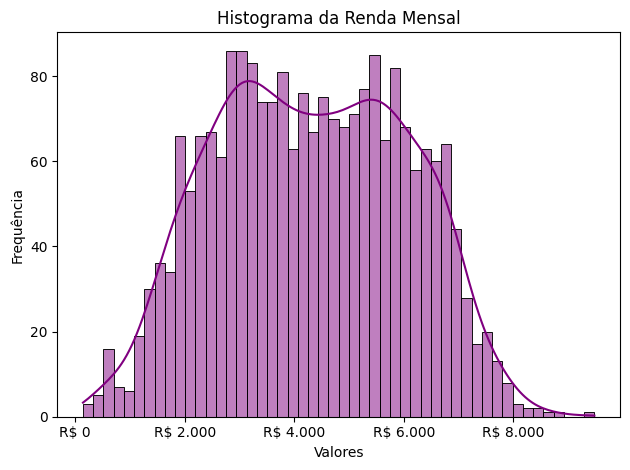

In [ ]:
# Qual é a distribuicao de salarios? 

# funcao para formatar em reais o dado de renda

def formatar_em_reais(x, _):
    return f'R$ {x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")

# Criando o histograma com Seaborn
sn.histplot(dados['renda_mensal'], bins = 50, kde='TRUE', color= 'purple')

# usando a funcao de formatar em reais no eixo x

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

plt.title('Histograma da Renda Mensal')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

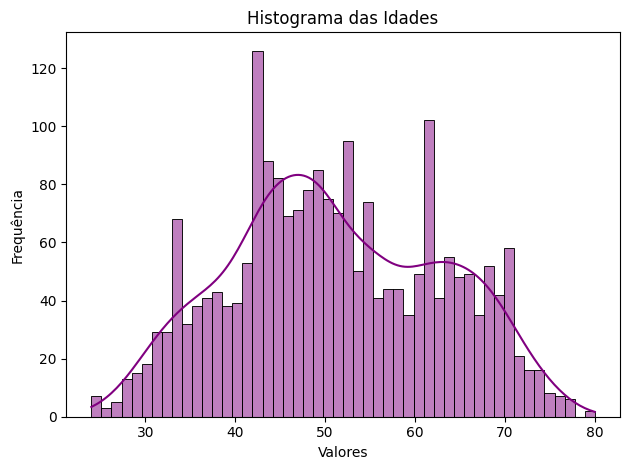

In [138]:
# Qual é a distribuicao das idades? 


# Criando o histograma com Seaborn
sn.histplot(dados['Age'], bins = 50, kde='TRUE', color= 'purple')

plt.title('Histograma das Idades')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()


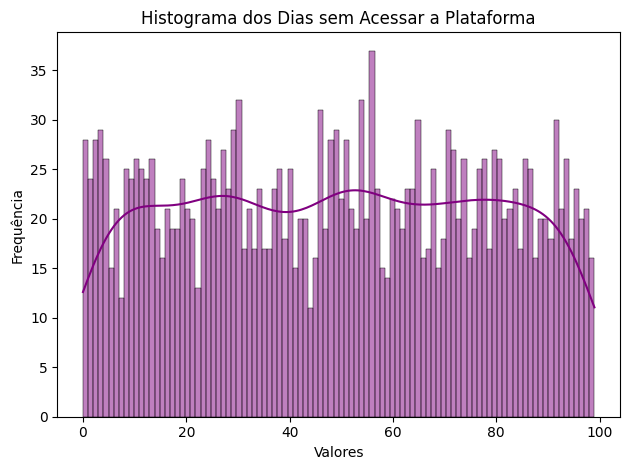

In [145]:
# Qual é a distribuicao dos dias sem acessar a plataforma? 


# Criando o histograma com Seaborn
sn.histplot(dados['Recency'], bins = 100, kde='TRUE', color= 'purple')

plt.title('Histograma dos Dias sem Acessar a Plataforma')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

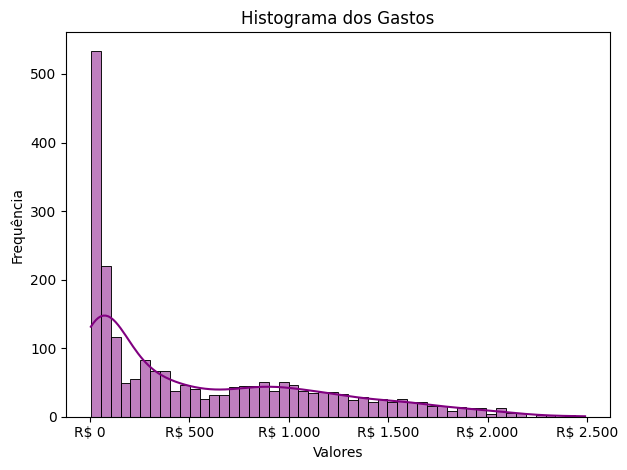

In [148]:
# Qual é a distribuicao dos gastos na plataforma? 

# funcao para formatar em reais o dado de gasto

def formatar_em_reais(x, _):
    return f'R$ {x:,.0f}'.replace(",", "X").replace(".", ",").replace("X", ".")

# Criando o histograma com Seaborn
sn.histplot(dados['expenses'], bins = 50, kde='TRUE', color= 'purple')

# usando a funcao de formatar em reais no eixo x

plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_em_reais))

plt.title('Histograma dos Gastos')
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Valores distintos da formaçao academica

dados['education_level'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [58]:
# Qual é o nivel educacional dos clientes? 

contagem = dados['education_level'].value_counts()

percentual = dados['education_level'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(2)

})

,Quantidade,Percentual (%)
education_level,,
Graduation,1113,50.48
PhD,476,21.59
Master,364,16.51
2n Cycle,198,8.98
Basic,54,2.45


In [151]:
# Valores distintos do estado civil

dados['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [60]:
# Qual é o estado civil dos clientes? 

contagem = dados['marital_status'].value_counts()

percentual = dados['marital_status'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(2)

})

,Quantidade,Percentual (%)
marital_status,,
Married,854,38.73
Together,568,25.76
Single,477,21.63
Divorced,230,10.43
Widow,76,3.45


Nessa seção tentamos entender mais profundamente o perfil dos clientes da base de dados. Levando em conta os dados gerais levantados anteriormente, vamos aos insights que essa análise mais detalhada possibilitou: 

1. Idade: Tinhamos uma ideia de que a idade variava bastante (de 24 a 80 anos). Com o histograma essa variação ficou mais evidente, no entanto está ainda mais evidente que o publico da plataforma está bem concentrado entre as faixas 40 - 50 anos. 
2. 

<font color = #99c9bd> **Impacto do Perfil no Gasto na Plataforma**

In [152]:
dados.groupby('marital_status')['kids'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
marital_status,,,
Divorced,1.01,1.0,0.74
Married,0.97,1.0,0.73
Single,0.86,1.0,0.78
Together,0.98,1.0,0.75
Widow,0.88,1.0,0.75


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/3288484017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)


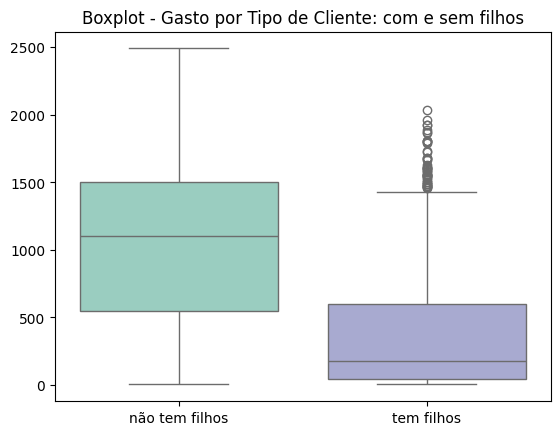

In [83]:
# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

dados['tem_filhos'] = np.where(dados['kids'] == 0, 'não tem filhos', 'tem filhos')

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: com e sem filhos')

plt.show()

/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2575319134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)


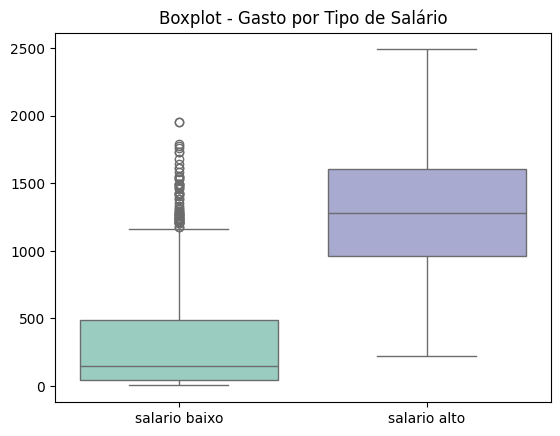

In [90]:
# Pessoas que têm um maior salário gastam mais?

q3 = dados['renda_mensal'].quantile(0.75)

dados['faixa_salarial'] = dados['renda_mensal'].apply(lambda x: 'salario alto' if x > q3 else 'salario baixo')

dados['faixa_salarial'].value_counts()

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Salário')

plt.show()

In [91]:
dados.groupby('faixa_salarial')['expenses'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
faixa_salarial,,,
salario alto,1293.50,1279.0,437.41
salario baixo,319.33,144.5,375.93
